In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import tree
%matplotlib inline

# define a function for calculating the metric to be used later 
def classification_metrics(Y_pred, Y_true):
    acc = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1score = f1_score(Y_true, Y_pred)

    return acc, precision, recall, f1score

# define a function for printing the metrics 
def display_metrics(classifierName,Y_pred,Y_true):
    print ("______________________________________________")
    print ("Model: "+classifierName)
    acc, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
    print ("Accuracy: "+str(acc))
    print ("Precision: "+str(precision))
    print ("Recall: "+str(recall))
    print ("F1-score: "+str(f1score))
    print ("______________________________________________")
    print ("")


In [2]:
data = pd.read_csv("DSI_kickstarterscrape_dataset_dummy.csv", engine='python')
data

,Unnamed: 0,Unnamed:_0,project_id,name,url,goal,pledged,funded_percentage,backers,levels,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,0,0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,10500.0,11545,1.099524,66,7,...,0,0,0,0,0,0,0,0,0,0
1,1,1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,4000.0,20,0.005000,2,5,...,0,0,0,0,0,0,0,0,0,0
2,2,2,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,6000.0,6535,1.089167,100,13,...,0,0,0,0,0,0,0,0,0,0
3,3,3,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,3500.0,0,0.000000,0,6,...,0,0,0,0,1,0,0,0,0,0
4,4,4,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,3500.0,3582,1.023331,39,7,...,0,0,0,0,1,0,0,0,0,0
5,5,5,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,1000.0,280,0.280000,8,5,...,0,1,0,0,0,0,0,0,0,0
6,6,6,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,2000.0,2180,1.090000,46,7,...,1,0,0,0,0,0,0,0,0,0
7,7,7,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,1000.0,1125,1.125000,30,12,...,0,0,0,0,0,0,0,0,0,0
8,8,8,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,7500.0,9836,1.311527,255,10,...,0,0,0,0,0,0,0,1,0,0
9,9,10,735377,The Janks music video series,http://www.kickstarter.com/projects/thejanks/t...,20000.0,20138,1.006911,115,21,...,1,0,0,0,0,0,0,0,0,0


In [3]:
data.describe()

,Unnamed: 0,Unnamed:_0,project_id,goal,pledged,funded_percentage,backers,levels,updates,comments,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
count,40553.00000,40553.000000,4.055300e+04,4.055300e+04,4.055300e+04,40553.000000,40553.000000,40553.000000,40553.000000,40553.000000,...,40553.000000,40553.000000,40553.000000,40553.000000,40553.000000,40553.000000,40553.000000,40553.000000,40553.000000,40553.000000
mean,20276.00000,20951.820852,1.080900e+09,1.053080e+04,5.208013e+03,1.778931,72.257022,7.994304,4.326610,8.472789,...,0.079452,0.078638,0.075161,0.064952,0.066777,0.110497,0.137721,0.063423,0.066678,0.063399
std,11706.78707,12105.945619,6.216318e+08,1.503442e+05,6.008627e+04,80.051930,725.151626,4.203440,6.594027,178.206685,...,0.270446,0.269176,0.263654,0.246444,0.249638,0.313513,0.344611,0.243726,0.249467,0.243681
min,0.00000,0.000000,3.940900e+04,5.000000e-01,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10138.00000,10462.000000,5.433518e+08,1.700000e+03,2.300000e+02,0.053133,6.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20276.00000,20942.000000,1.079778e+09,4.000000e+03,1.481000e+03,1.005905,25.000000,7.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30414.00000,31425.000000,1.621048e+09,9.000000e+03,4.456000e+03,1.131452,62.000000,10.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40552.00000,41931.000000,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.000000,19311.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Trial 1

In [66]:
X = data[['goal','levels','updates','comments','duration','Average','CV','date','year']
          +[i for i in data.columns if i.startswith('category')][1:]
         +[i for i in data.columns if i.startswith('subcategory')][1:]
        +[i for i in data.columns if i.startswith('location')][1:]
        +[i for i in data.columns if i.startswith('weekday')][1:]
        +[i for i in data.columns if i.startswith('month')][1:]]
y = data['status_successful'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# original data columns except backers, pledged, funded_percentage

In [67]:
rfc = RandomForestClassifier(n_estimators=500)

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
y_pred = rfc.predict(X_test)

In [70]:
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[4328 1144]
 [ 763 5931]]
______________________________________________
Model: Random Forest
Accuracy: 0.843251685023837
Precision: 0.838303886925795
Recall: 0.8860173289512997
F1-score: 0.8615004720749511
______________________________________________



## Trial 2

In [37]:
X = data[['goal','levels','updates','comments','duration','Average','CV','date','year','FAQ','video','length(s)']
          +[i for i in data.columns if i.startswith('category')][1:]
         +[i for i in data.columns if i.startswith('subcategory')][1:]
        +[i for i in data.columns if i.startswith('location')][1:]
        +[i for i in data.columns if i.startswith('weekday')][1:]
        +[i for i in data.columns if i.startswith('month')][1:]]
y = data['status_successful'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# blended data with crawled columns except backers, pledged, funded_percentage

In [38]:
dt = DecisionTreeClassifier() #create a Decision Tree model (call it 'dt')

In [39]:
dt.fit(X_train,y_train) #fit using the data 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_pred = dt.predict(X_test) #predict using the decision tree 'dt' given the x variables

In [41]:
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Decision Tree', y_pred, y_test)

confusion matrix: 
 [[4177 1295]
 [1278 5416]]
______________________________________________
Model: Decision Tree
Accuracy: 0.7885089593950353
Precision: 0.8070332290269706
Recall: 0.8090827606812071
F1-score: 0.8080566952629615
______________________________________________



[Text(0,0,'updates'),
 Text(0,0,'goal'),
 Text(0,0,'comments'),
 Text(0,0,'Average'),
 Text(0,0,'duration'),
 Text(0,0,'CV'),
 Text(0,0,'length(s)'),
 Text(0,0,'date'),
 Text(0,0,'levels'),
 Text(0,0,'year'),
 Text(0,0,'category_Theater'),
 Text(0,0,'category_Music'),
 Text(0,0,'category_Games'),
 Text(0,0,'location_New York, NY'),
 Text(0,0,'FAQ'),
 Text(0,0,'location_Los Angeles, CA'),
 Text(0,0,'category_Publishing'),
 Text(0,0,'weekday_Sat'),
 Text(0,0,'month_May'),
 Text(0,0,'category_Film & Video'),
 Text(0,0,'location_Brooklyn, NY'),
 Text(0,0,'weekday_Sun'),
 Text(0,0,'month_Jan'),
 Text(0,0,'subcategory_Short Film'),
 Text(0,0,'month_Dec'),
 Text(0,0,'location_San Francisco, CA'),
 Text(0,0,'month_Mar'),
 Text(0,0,'month_Oct'),
 Text(0,0,'weekday_Wed'),
 Text(0,0,'category_Dance'),
 Text(0,0,'month_Jul'),
 Text(0,0,'subcategory_Indie Rock'),
 Text(0,0,'weekday_Thu'),
 Text(0,0,'month_Sep'),
 Text(0,0,'subcategory_Comics'),
 Text(0,0,'subcategory_Webseries'),
 Text(0,0,'locatio

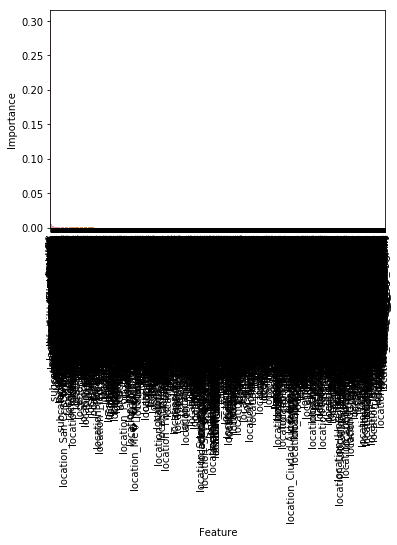

In [42]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':dt.feature_importances_})
importances = importances.sort_values('Importance', ascending=False) 
graph = sns.barplot(x=importances['Feature'], y=importances['Importance'], data=importances)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90) # rotate x-axis labels

In [43]:
rfc = RandomForestClassifier(n_estimators=500)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred = rfc.predict(X_test)

In [46]:
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[4315 1157]
 [ 737 5957]]
______________________________________________
Model: Random Forest
Accuracy: 0.8443202367253
Precision: 0.8373629463030644
Recall: 0.8899014042426053
F1-score: 0.8628331402085748
______________________________________________



## Trial 3

In [47]:
X = data[['goal','levels','updates','comments','duration','Average','CV','date','FAQ','length(s)']
          +[i for i in data.columns if i.startswith('category')][1:]
       # +[i for i in data.columns if i.startswith('weekday')][1:]
        +[i for i in data.columns if i.startswith('month')][1:]]
y = data['status_successful'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# blended data with crawled columns except backers, pledged, funded_percentage, location, subcategory, year, 
# weekday, video

In [48]:
dt = DecisionTreeClassifier() #create a Decision Tree model (call it 'dt')

In [49]:
dt.fit(X_train,y_train) #fit using the data 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_pred = dt.predict(X_test) #predict using the decision tree 'dt' given the x variables

In [51]:
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Decision Tree', y_pred, y_test)

confusion matrix: 
 [[4118 1354]
 [1446 5248]]
______________________________________________
Model: Decision Tree
Accuracy: 0.7698504027617952
Precision: 0.7949106331414723
Recall: 0.7839856587989245
F1-score: 0.789410348977136
______________________________________________



[Text(0,0,'updates'),
 Text(0,0,'goal'),
 Text(0,0,'comments'),
 Text(0,0,'Average'),
 Text(0,0,'duration'),
 Text(0,0,'CV'),
 Text(0,0,'length(s)'),
 Text(0,0,'date'),
 Text(0,0,'levels'),
 Text(0,0,'FAQ'),
 Text(0,0,'category_Theater'),
 Text(0,0,'category_Music'),
 Text(0,0,'category_Games'),
 Text(0,0,'category_Film & Video'),
 Text(0,0,'month_May'),
 Text(0,0,'month_Mar'),
 Text(0,0,'category_Publishing'),
 Text(0,0,'month_Dec'),
 Text(0,0,'month_Oct'),
 Text(0,0,'month_Jan'),
 Text(0,0,'month_Jul'),
 Text(0,0,'month_Feb'),
 Text(0,0,'category_Photography'),
 Text(0,0,'category_Dance'),
 Text(0,0,'month_Jun'),
 Text(0,0,'category_Design'),
 Text(0,0,'category_Fashion'),
 Text(0,0,'month_Nov'),
 Text(0,0,'month_Sep'),
 Text(0,0,'category_Technology'),
 Text(0,0,'category_Food'),
 Text(0,0,'category_Digital Art')]

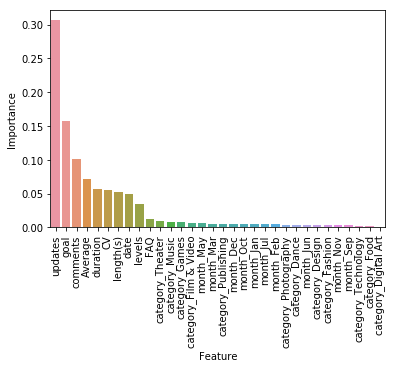

In [52]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':dt.feature_importances_})
importances = importances.sort_values('Importance', ascending=False) 
graph = sns.barplot(x=importances['Feature'], y=importances['Importance'], data=importances)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90) # rotate x-axis labels

In [61]:
rfc = RandomForestClassifier(n_estimators=500)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
y_pred = rfc.predict(X_test)

In [64]:
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[4419 1053]
 [ 831 5863]]
______________________________________________
Model: Random Forest
Accuracy: 0.8451421995725793
Precision: 0.8477443609022557
Recall: 0.8758589781894234
F1-score: 0.8615723732549596
______________________________________________



[Text(0,0,'updates'),
 Text(0,0,'comments'),
 Text(0,0,'goal'),
 Text(0,0,'Average'),
 Text(0,0,'duration'),
 Text(0,0,'CV'),
 Text(0,0,'length(s)'),
 Text(0,0,'date'),
 Text(0,0,'levels'),
 Text(0,0,'FAQ'),
 Text(0,0,'category_Music'),
 Text(0,0,'category_Theater'),
 Text(0,0,'category_Film & Video'),
 Text(0,0,'month_May'),
 Text(0,0,'category_Publishing'),
 Text(0,0,'month_Mar'),
 Text(0,0,'category_Games'),
 Text(0,0,'month_Dec'),
 Text(0,0,'month_Feb'),
 Text(0,0,'month_Jun'),
 Text(0,0,'month_Oct'),
 Text(0,0,'month_Sep'),
 Text(0,0,'month_Jan'),
 Text(0,0,'month_Jul'),
 Text(0,0,'month_Nov'),
 Text(0,0,'category_Design'),
 Text(0,0,'category_Fashion'),
 Text(0,0,'category_Dance'),
 Text(0,0,'category_Photography'),
 Text(0,0,'category_Food'),
 Text(0,0,'category_Technology'),
 Text(0,0,'category_Digital Art')]

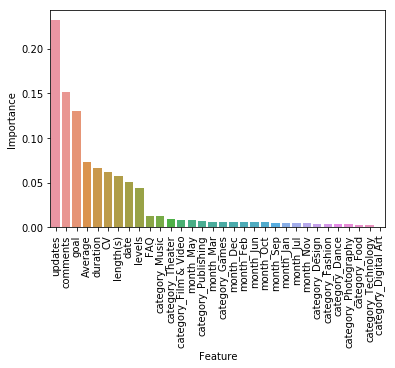

In [65]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':rfc.feature_importances_})
importances = importances.sort_values('Importance', ascending=False) 
graph = sns.barplot(x=importances['Feature'], y=importances['Importance'], data=importances)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90) # rotate x-axis labels

In [57]:
et = ExtraTreeClassifier()

In [58]:
et.fit(X_train,y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [59]:
y_pred = et.predict(X_test)

In [60]:
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Extra Tree', y_pred, y_test)

confusion matrix: 
 [[3591 1881]
 [1875 4819]]
______________________________________________
Model: Extra Tree
Accuracy: 0.6912707545618938
Precision: 0.7192537313432836
Recall: 0.7198984164923813
F1-score: 0.7195759295206808
______________________________________________



[Text(0,0,'updates'),
 Text(0,0,'comments'),
 Text(0,0,'goal'),
 Text(0,0,'duration'),
 Text(0,0,'CV'),
 Text(0,0,'Average'),
 Text(0,0,'date'),
 Text(0,0,'levels'),
 Text(0,0,'FAQ'),
 Text(0,0,'video'),
 Text(0,0,'category_Music'),
 Text(0,0,'category_Theater'),
 Text(0,0,'category_Film & Video'),
 Text(0,0,'category_Publishing'),
 Text(0,0,'category_Fashion'),
 Text(0,0,'category_Dance'),
 Text(0,0,'category_Photography'),
 Text(0,0,'category_Technology'),
 Text(0,0,'category_Design'),
 Text(0,0,'category_Food'),
 Text(0,0,'category_Games'),
 Text(0,0,'category_Digital Art')]

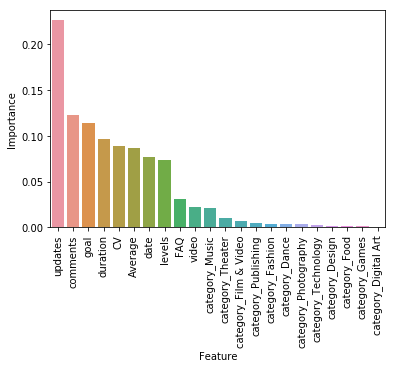

In [28]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':et.feature_importances_})
importances = importances.sort_values('Importance', ascending=False) 
graph = sns.barplot(x=importances['Feature'], y=importances['Importance'], data=importances)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90) # rotate x-axis labels